# Case 1 - Lending Club Loan Data

For this case study, we are examining data from the Lending Club on 10,000 loans lended to individuals by other individuals. Each data point contains 55 fields about the individual receiving the loan and information about the loan itself.

The goal of this analysis is to predict the loan's interest rate from the applicant's information, as riskier loans tend to have higher interest rates.

To investigate all fields in the data, I will be grouping the fields into more general sections and interspersing graphs and data analysis throughout.

The first section is general information about the applicant. Fields include
- emp_title: The applicant's job title, can be blank
- emp_length: The number of years the applicant has had the job. If this number is > 10, it is displayed as 10. NA if emp_title is blank
- state: The applicant's two letter state code
- homeownership: The applicant's home ownership status. One of RENT, MORTGAGE, or OWN

Since the employee titles are not standardized, it is very difficult to use the employee titles to do data analysis. It may be more helpful to divide the jobs into more broad categories to be analysed.

Below, I plotted graphs for the proportion of applicants in each state and the average interest rate for each state, and did the same thing for home ownership. Note that the error bars on the average interest rate plots indicate the standard deviation of the interest rates.

We can see from the home ownership plots that the majority of applicants have a mortgage at close to 50%. However, home ownership does not seem to play a big role in the interest rate as all three categories have an average between 12% to 13%. Renters have on average the largest interest rate, most likely because renting is a sign that they may not have as much income as the other two cases.

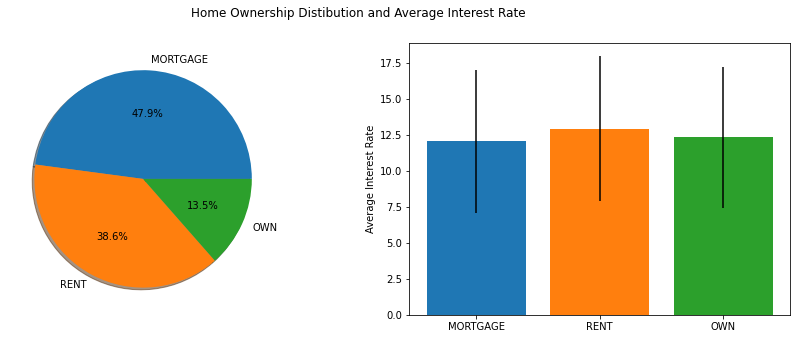

In [15]:
from case1_data import *
import matplotlib.pyplot as plt

data = Case1Data()
home_dist = data.distribution("homeownership")
home_avg_std = data.avg_std("homeownership", "interest_rate")
labs = home_avg_std.keys()
avgs, stds = zip(*home_avg_std.values())

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.pie(home_dist.values(), labels=home_dist.keys(), shadow=True, autopct='%1.1f%%')

ax2.bar(x=list(labs), height=list(avgs), yerr=list(stds), color=["C0","C1","C2"])
ax2.set_ylabel("Average Interest Rate")

plt.suptitle("Home Ownership Distibution and Average Interest Rate")
plt.show()


From the state plots, we can see there is a large variance for the number of applicants from each state, with California, Texas, New York, and Florida having the most applicants. The average interest rate is fairly constant across the larger states, but the smaller states have a more varied average interest rate because of the smaller sample sizes.

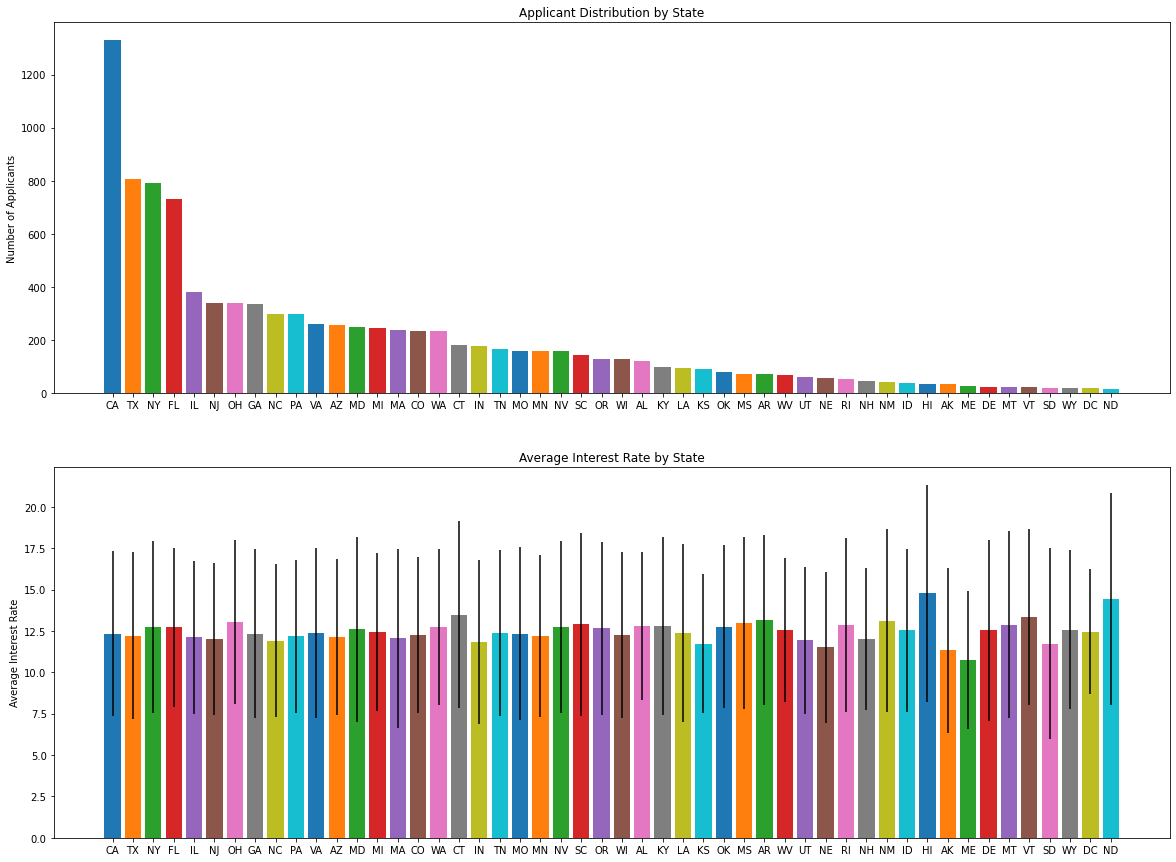

In [16]:
state_dist = data.distribution("state").items()
state_dist = sorted(state_dist, key=lambda x:x[1], reverse=True)
states, freq = zip(*state_dist)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,15))

colors = ["C"+str(i%10) for i in range(len(states))]

ax1.bar(x=states, height=freq, color=colors)
ax1.set_title("Applicant Distribution by State")
ax1.set_ylabel("Number of Applicants")

state_avgs_stds = data.avg_std("state", "interest_rate")

avgs = []
stds = []
for s in states:
    a_s = state_avgs_stds[s]
    avgs.append(a_s[0])
    stds.append(a_s[1])

ax2.bar(x=states, height=avgs, yerr=stds, color=colors)
ax2.set_title("Average Interest Rate by State")
ax2.set_ylabel("Average Interest Rate")

plt.show()

The next section deals with the applicants annual income
- annual_income: The applicant's annual income in dollars
- verified_income: Whether the income is verified. One of Not Verified, Verified, or Source Verified
- debt_to_income: The applicant's debt to income ratio.
If the loan is a joint application, the joint annual income, verification, and debt to income ratio are also listed, otherwise it is listed as NA.

An issue with this data set is with joint applications. It is unclear how other fields are handled for joint applications. For example, for lines of credit and account fields, it is unclear if these aggregate both applicants for joint applications, or if it is only for the primary applicant.

To investigate the effects of income on the loan, I plotted the annual income versus both interest rate and the loan amount. For joint applications, I took the joint income as that is more representative of the applicants. The s axis (income) is set to a log scale as there is a large range of income for the applicants.

We can see from the plots that joint applicants generally have higher income compared to individual applicants, though the highest earners are mostly individuals. The application type does not seem to make a difference in the interest rate or loan amount.

The interest rate distribution is fairly uniform across all income levels, but the loan amount does increase as the annual income increases.

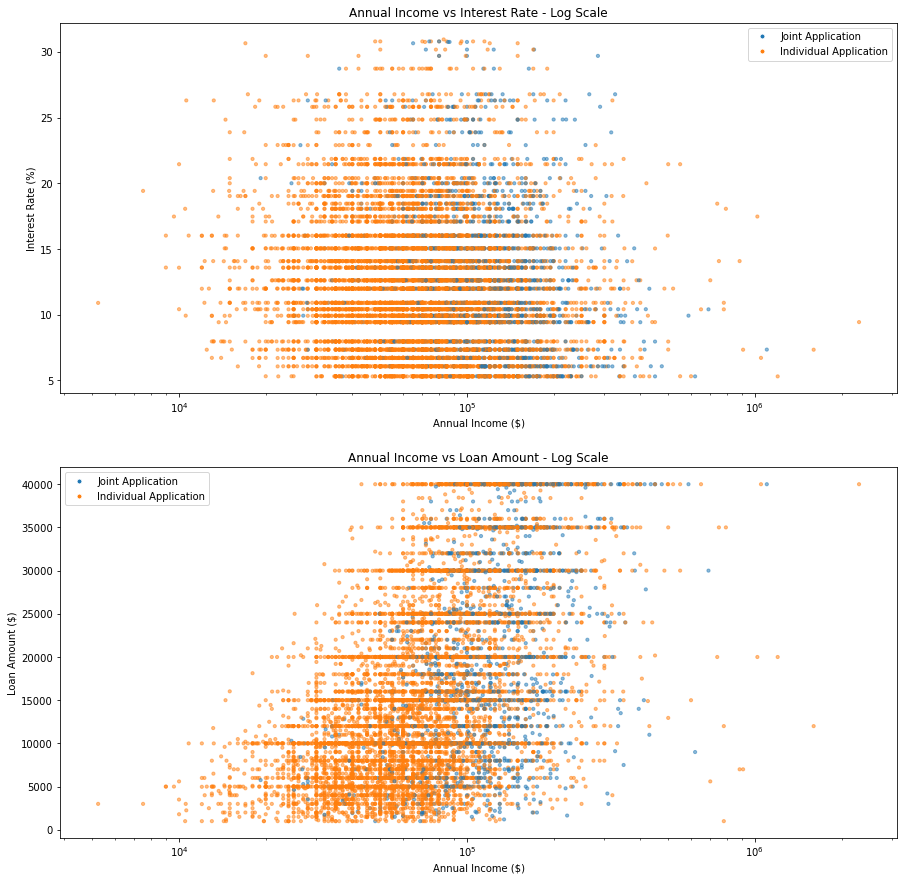

In [17]:
from matplotlib.lines import Line2D

single_income = data.get_num("annual_income")
joint_income = data.get_num("annual_income_joint")
joint = data.data["application_type"]

income = [joint_income[i] if x=="joint" else single_income[i] for i,x in enumerate(joint)]
color = ["C0" if x=="joint" else "C1" for x in joint]
rate = data.get_num("interest_rate")
amt = data.get_num("loan_amount")

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Joint Application',
                          markerfacecolor='C0', markersize=5),
                   Line2D([0], [0], marker='o', color='w', label='Individual Application',
                          markerfacecolor='C1', markersize=5)]

ax1.scatter(income, rate, c=color, s=10, alpha=0.5)
ax1.set_xscale('log')
ax1.legend(handles=legend_elements)
ax1.set_xlabel("Annual Income ($)")
ax1.set_ylabel("Interest Rate (%)")
ax1.set_title("Annual Income vs Interest Rate - Log Scale")

ax2.scatter(income, amt, c=color, s=10, alpha=0.5)
ax2.set_xscale('log')
ax2.legend(handles=legend_elements)
ax2.set_xlabel("Annual Income ($)")
ax2.set_ylabel("Loan Amount ($)")
ax2.set_title("Annual Income vs Loan Amount - Log Scale")

plt.show()

The next section contains information about the applicant's credit, collections, and accounts.
- delinq_2y: Deliquencies on lines of credit for last 2 years
- months_since_last_delinq: Months since last deliquency
- earliest_credit_line: Duration of earliest line of credit in years
- inquiries_last_12m: Number of inquires into the applicant's credit over the last 12 months
- total_credit_lines: Total number of lines of credit
- open_credit_lines: Number of open lines of credit
- total_credit_limit: Total available credit, excluding mortgages
- total_credit_utilized: Total credit balance, excluding mortgages
- num_collections_last_12m: Number of collections in the last 12 months
- num_historical_failed_to_pay: Number of times the applicant has failed to pay
- months_since_90d_late: Number of months since the last time applicant was 90 days late for a payment
- current_accounts_delinq: Number of accounts the applicant is delinquent
- total_collection_amount_ever: Total amount applicant has in collections
- current_installment_accounts: Number of fixed payment accounts
- accounts_opened_24m: New accounts opened in last 24 months
- months_since_last_credit_inquiry: Months since last inquiry
- num_satisfactory_accounts: Number of satisfactory accounts
- num_accounts_120d_past_due / num_accounts_30d_past_due: Number of accounts 120 and 30 days past due
- num_active_debit_accounts: Number of active bank cards
- total_debit_limit: Sum of all bank card limits
- num_total_cc_accounts: Total credit card accounts in history
- num_open_cc_accounts: Number of open credit card accounts
- num_cc_carrying_balance: Number of credit cards with a balance
- num_mort_accounts: Number of mortgage accounts
- account_never_delinq_percent: Percent of lines of credits with no delinquency
- tax_liens: Number of tax liens
- public_record_bankrupt: Number of bankruptcies

Since there are a large number of data fields in this category, we cannot investigate them all. I chose to look into the account_never_delinq_percent and num_satisfactory_accounts vs the interest rate as those two give a good overview on how often the applicant has failed to make payments, which could make the applicant riskier, and the number of accounts with no recent late payments, which could make the applicant less risky.

For the plots, I used a heatmap to show the distribution between the accounts and the interest rate. For the percentage of delinquent accounts, most of the applicants have no delinquent accounts so I cut off the heatmap at 99% to view the delinquents more visibly.

We can see that most applicants are clustered around 10 satisfactory accounts and 10% interest rate, and (excluding the 100% never delinquents) are clustered around 95% never delinquent and 10% interest rate. There is not a strong correlation between these fields and the interest rate.

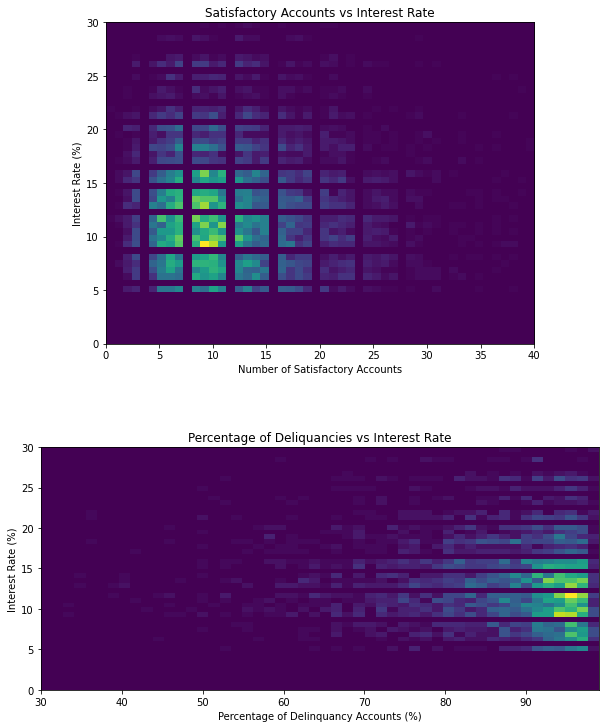

In [18]:
percent_del = data.get_num("account_never_delinq_percent")
satisfactory = data.get_num("num_satisfactory_accounts")
rate = data.get_num("interest_rate")

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,13))

heatmap, xedges, yedges = np.histogram2d(satisfactory, rate, bins=50, range=[[0, 40], [0,30]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

ax1.imshow(heatmap.T, extent=extent, origin='lower')
ax1.set_xlabel("Number of Satisfactory Accounts")
ax1.set_ylabel("Interest Rate (%)")
ax1.set_title("Satisfactory Accounts vs Interest Rate")


heatmap, xedges, yedges = np.histogram2d(percent_del, rate, bins=50, range=[[30, 99], [0,30]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

ax2.imshow(heatmap.T, extent=extent, origin='lower')
ax2.set_xlabel("Percentage of Delinquancy Accounts (%)")
ax2.set_ylabel("Interest Rate (%)")
ax2.set_title("Percentage of Deliquancies vs Interest Rate")

plt.show()

The next section contains information on the loan itself. Note that some of the fields have information obtained after the loan is issued, such as the current balance and amount of interest paid. I will not be using such information for predicting the interest rate.

- loan_purpose: The purpose of the loan. One of car, credit_card, debt_consolidation, home_improvement, house, major_purchase, medical, moving, renewable_energy, small_business, vacation, or other
- application_type: individual or joint
- loan_amount: The loan amount
- term: Number of months of the loan
- interest_rate: Interest rate on the loan
- installment: Monthly payment for the loan
- grade / sub_grade: Grade of the loan
- issue_month: Month loan was issued
- loan_status: Current status of the loan
- initial_listing_status: Listing status of the loan
- disbursement_method: Dispersement method of the loan
- balance: The current balance of the loan
- paid_total: Current amount paid of the loan
- paid_principal: Amount of the principle paid
- paid_interest: Amount of interest paid
- paid_late_fees: Amount of late fees paid

For predicting the interest rate, I will not be using any fields below "term", as the grade and paid interest can be used to easily predict the interest rate.

The first graph below shows the distribution of the various loan purposes and the corresponding average interest rate and average loan amount. We can see that debt consolidation and credit cards account for the majority of loans. The interest rate does not vary a lot between loan types, but the loan amount does as loans for vacations and car maintenance will need a lot less compared to small businesses and houses.

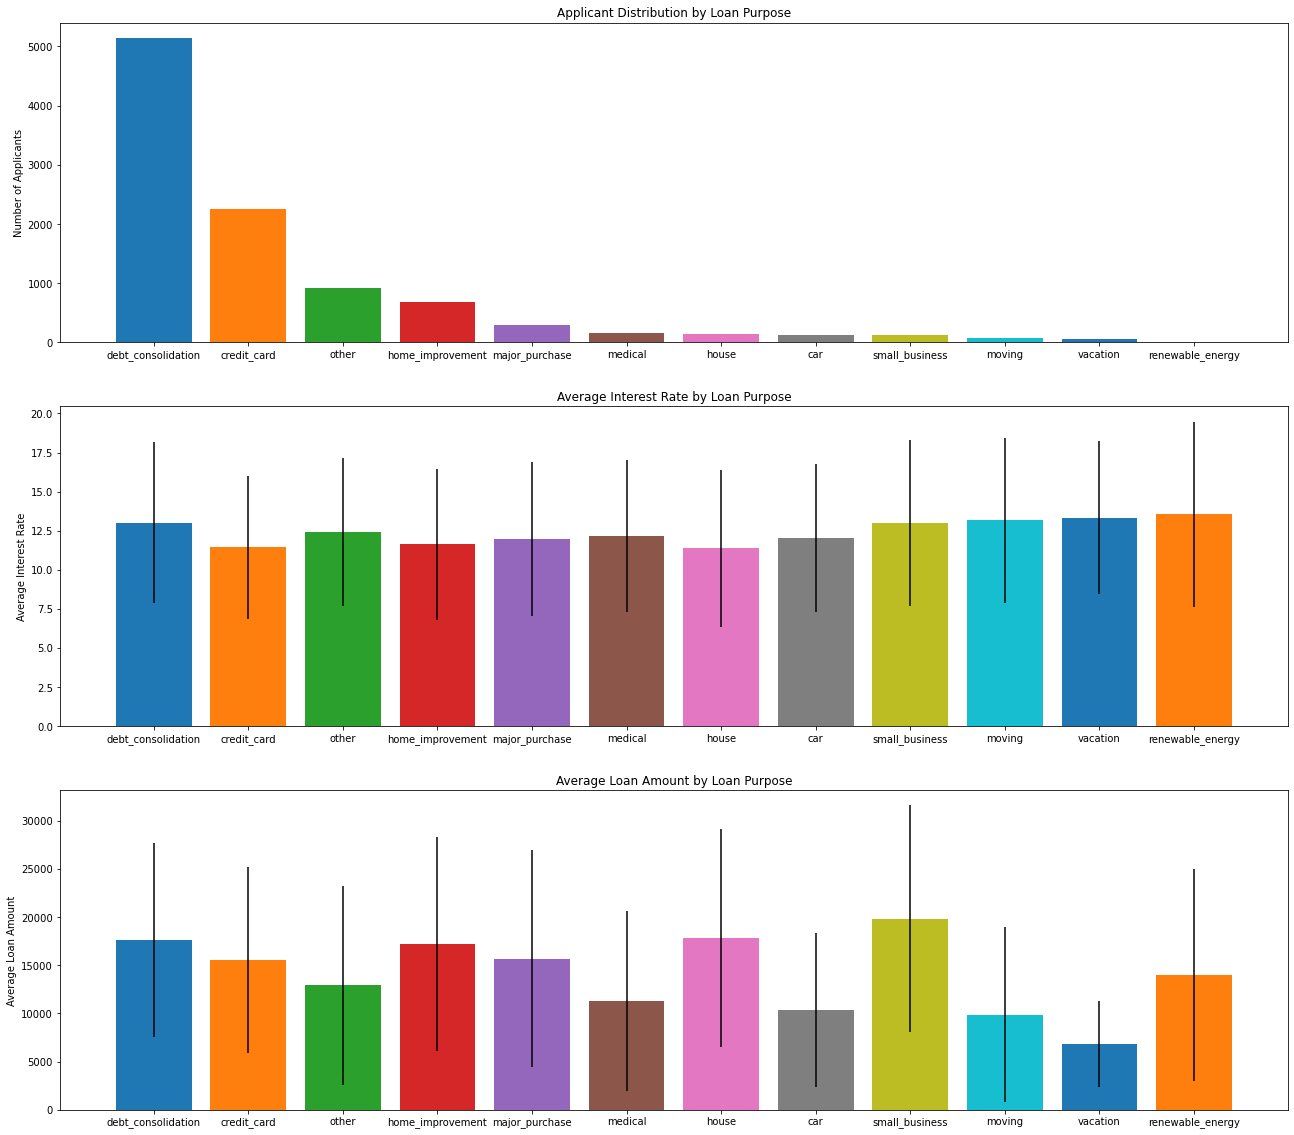

In [19]:
purpose_dist = data.distribution("loan_purpose").items()
purpose_dist = sorted(purpose_dist, key=lambda x:x[1], reverse=True)
purpose, freq = zip(*purpose_dist)

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(22,20))

colors = ["C"+str(i%10) for i in range(len(purpose))]

ax1.bar(x=purpose, height=freq, color=colors)
ax1.set_title("Applicant Distribution by Loan Purpose")
ax1.set_ylabel("Number of Applicants")

purpose_avgs_stds = data.avg_std("loan_purpose", "interest_rate")

avgs = []
stds = []
for s in purpose:
    a_s = purpose_avgs_stds[s]
    avgs.append(a_s[0])
    stds.append(a_s[1])

ax2.bar(x=purpose, height=avgs, yerr=stds, color=colors)
ax2.set_title("Average Interest Rate by Loan Purpose")
ax2.set_ylabel("Average Interest Rate")

purpose_avgs_stds = data.avg_std("loan_purpose", "loan_amount")

avgs = []
stds = []
for s in purpose:
    a_s = purpose_avgs_stds[s]
    avgs.append(a_s[0])
    stds.append(a_s[1])

ax3.bar(x=purpose, height=avgs, yerr=stds, color=colors)
ax3.set_title("Average Loan Amount by Loan Purpose")
ax3.set_ylabel("Average Loan Amount")

plt.show()

Next I plotted a heat map for the loan amount versus the interest rate. Most loans are concentrated around 10% interest and $10,000. For large loans, they tend to have an interest rate of around 20% with less varience.

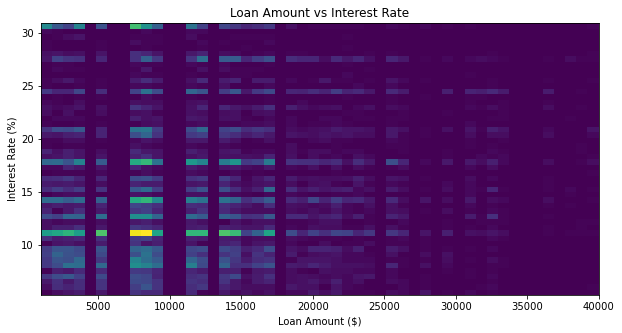

In [20]:
amt = data.get_num("loan_amount")
rate = data.get_num("interest_rate")

fig, ax1 = plt.subplots(1,1, figsize=(10,5))

heatmap, xedges, yedges = np.histogram2d(amt, rate, bins=50)

ax1.pcolormesh(xedges, yedges, heatmap)
ax1.set_xlabel("Loan Amount ($)")
ax1.set_ylabel("Interest Rate (%)")
ax1.set_title("Loan Amount vs Interest Rate")

plt.show()

## Predicting Interest Rate

The next task is to predict the interest rate on loans from the given field data. I will not be using any information from after the loan is issued, or information about the grade as that is very closely related to the interest rate. I will also be ignoring the job title as that is not standardized and can not be easily used for predictions.

To prepare the data for regression, I one hot encoded all string data types and standardized all number data types by removing the mean and standard deviation. NA values are set to 0.

To fit and test different algorithms for predicting interest rate, I split the Lending Club data into a train and test set with ration 75:25.

First, I used a Random Forest Regressor from sklearn. Random forest uses an ensemble of random trees to predict the interest rate. I tuned the random forest so that we use 250 trees in the forest, with each tree having a maximum depth of 50, and each tree is trained on half of the training data. 

We get an R squared value of around 0.4. The model is decent at predicting interest rates around 5-15% as most of the data is in that range, but underestimates the higher interest rate points. 

To visualize the model's performance, I plotted the predictions on the test data vs the true test data interest rate. I also plotted the best fit line, which has a lower slope compared to the true values. Below, I also included a heatmap to see the distribution of the predictions.

In [21]:
from case1_data import *
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

predictor = RegressionData(0.75)

 R-squared value: 0.39700233886684644


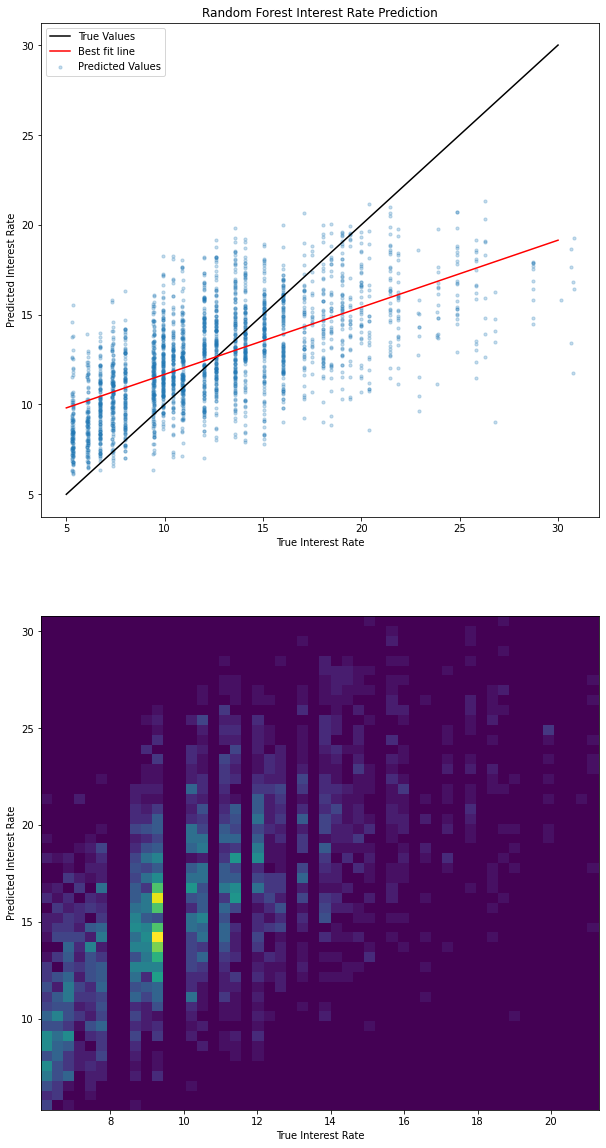

In [22]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor(max_depth=50, max_features="auto", n_estimators=250, bootstrap=True, max_samples=0.5)
predictor.train(rand_forest)
out = predictor.test(rand_forest)

r2 = r2_score(predictor.ytest, out)
print(f' R-squared value: {r2}')

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,20))

ax1.scatter(predictor.ytest, out, alpha=0.25, s=10)
ax1.plot([5,30], [5,30], c='k')

bestfit = np.polyfit(predictor.ytest, out, 1)
ax1.plot([5,30], [bestfit[1] + bestfit[0]*5,bestfit[1] + bestfit[0]*30], c='r')

ax1.set_title("Random Forest Interest Rate Prediction")
ax1.set_xlabel("True Interest Rate")
ax1.set_ylabel("Predicted Interest Rate")
ax1.legend(["True Values", "Best fit line", "Predicted Values"])

heatmap, xedges, yedges = np.histogram2d(out, predictor.ytest, bins=50)

ax2.pcolormesh(xedges, yedges, heatmap)
ax2.set_xlabel("True Interest Rate")
ax2.set_ylabel("Predicted Interest Rate")

plt.show()


I also experimented with a linear regression model to predict the interest rate. We get a similar performance with the linear regression compared to the random forest. After running the linear regression, we do need to do some post processing to limit the range to 5-30% as sometimes but rarely the model predicts a point widely outside the range.

 R-squared value: 0.35719771729780525


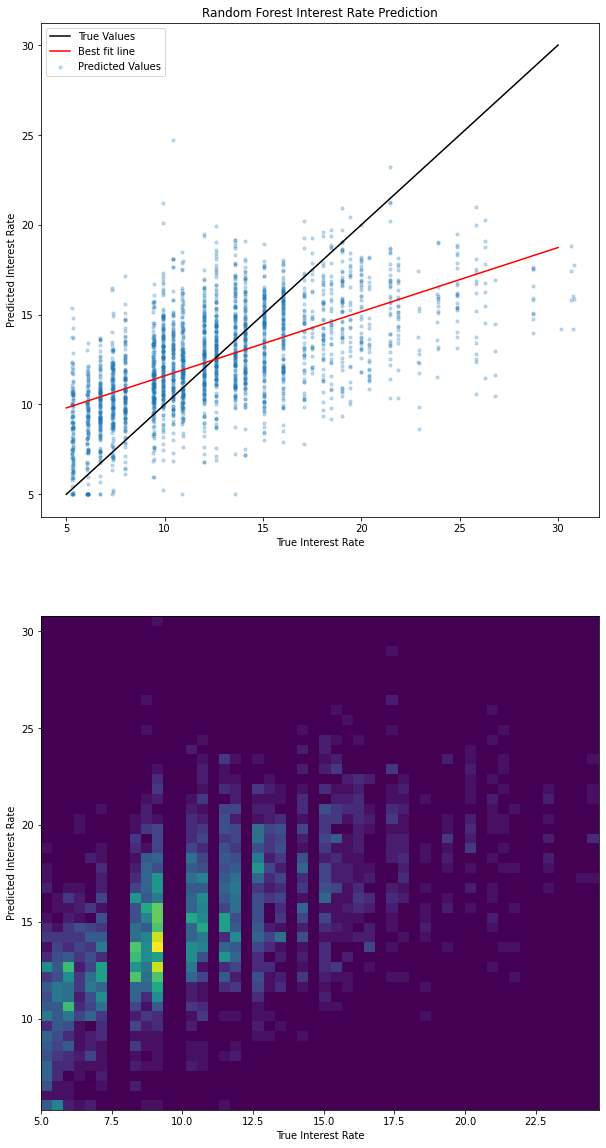

In [23]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
predictor.train(linear_reg)
out = predictor.test(linear_reg)

out = [min(30, max(5, x)) for x in out]

r2 = r2_score(predictor.ytest, out)
print(f' R-squared value: {r2}')

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,20))

ax1.scatter(predictor.ytest, out, alpha=0.25, s=10)
ax1.plot([5,30], [5,30], c='k')


bestfit = np.polyfit(predictor.ytest, out, 1)
ax1.plot([5,30], [bestfit[1] + bestfit[0]*5,bestfit[1] + bestfit[0]*30], c='r')

ax1.set_title("Random Forest Interest Rate Prediction")
ax1.set_xlabel("True Interest Rate")
ax1.set_ylabel("Predicted Interest Rate")
ax1.legend(["True Values", "Best fit line", "Predicted Values"])


heatmap, xedges, yedges = np.histogram2d(out, predictor.ytest, bins=50)

ax2.pcolormesh(xedges, yedges, heatmap)
ax2.set_xlabel("True Interest Rate")
ax2.set_ylabel("Predicted Interest Rate")

plt.show()

Both regression models have the problem where the model predicts values towards the median (around 15-20%). For example, the most common prediction for the data with true labels of 5% is around 10% instead. 

Since the interest rate is discretized, with almost a one-to-one mapping from interest rate to sub grade, we can instead predict the interest rate by classifying the sub grade instead. Below, I plotted the interest rates by subgrade. We can see from the error bars that most subgrades are constrained to a single interest rate value while some span a small range.

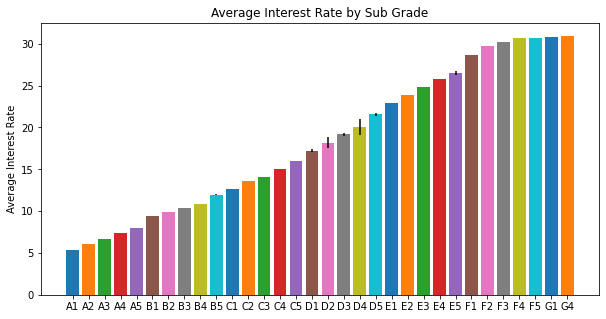

In [24]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

grade_avgs_stds = data.avg_std("sub_grade", "interest_rate").items()
grade_avgs_stds = sorted(grade_avgs_stds, key=lambda x:x[0], reverse=False)
grade, avgs_stds = zip(*grade_avgs_stds)
avgs, stds = zip(*avgs_stds)

colors = ["C"+str(i%10) for i in range(len(grade))]

ax.bar(x=grade, height=avgs, yerr=stds, color=colors)
ax.set_title("Average Interest Rate by Sub Grade")
ax.set_ylabel("Average Interest Rate")

plt.show()

To perform the classification, I used a logistic regression model. From the confusion matrix, we can see that the model is better at predicting the exact values (ie the most common predicted value is often close to the true value), however there is more variance as the range of predicted values is greater. Transforming the subgrades to interest rate by mapping to the average interest rate for each subgrade, we can compare our predictions with the regression models above. We get a R-squared of around 0.1, which is worse than the models above due to the larger spread of the predictions. Therefore, neither model is particularly good and there are tradeoffs for both.

 Accuracy: 0.114
 R-squared value: 0.13427156940571383


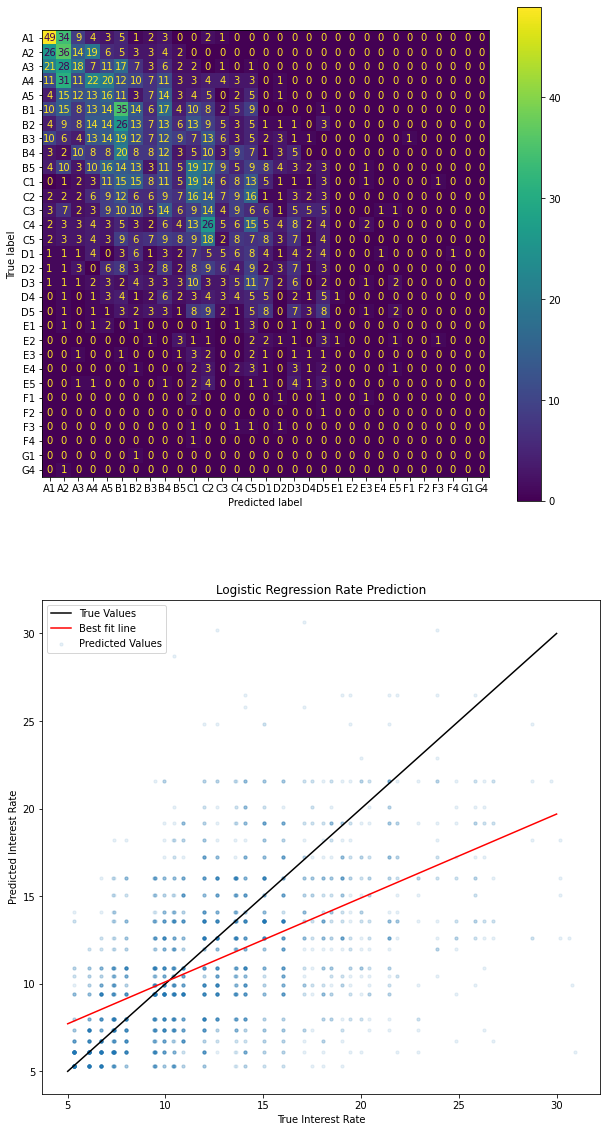

In [25]:
from case1_data import *
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score
import numpy as np

predictor = ClassificationData("sub_grade", 0.75)

from sklearn.linear_model import LogisticRegression

linear_reg = LogisticRegression(max_iter=500)
predictor.train(linear_reg)
out = predictor.test(linear_reg)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,20))

ConfusionMatrixDisplay.from_predictions(predictor.ytest, out, ax=ax1)

out2 = predictor.transform_interest(out)


r2 = r2_score(predictor.interest_test, out2)
print(f' R-squared value: {r2}')


ax2.scatter(predictor.interest_test, out2, s=10, alpha=0.1)
ax2.plot([5,30], [5,30], c='k')

bestfit = np.polyfit(predictor.interest_test, out2, 1)
ax2.plot([5,30], [bestfit[1] + bestfit[0]*5,bestfit[1] + bestfit[0]*30], c='r')

ax2.set_title("Logistic Regression Rate Prediction")
ax2.set_xlabel("True Interest Rate")
ax2.set_ylabel("Predicted Interest Rate")
ax2.legend(["True Values", "Best fit line", "Predicted Values"])

plt.show()